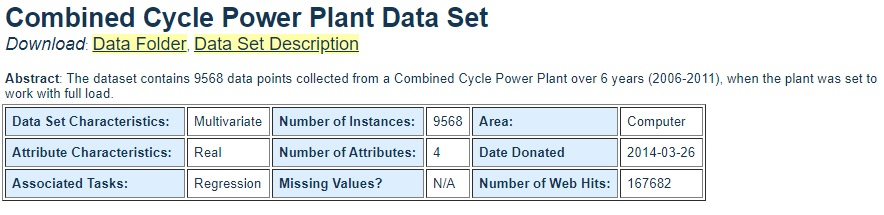

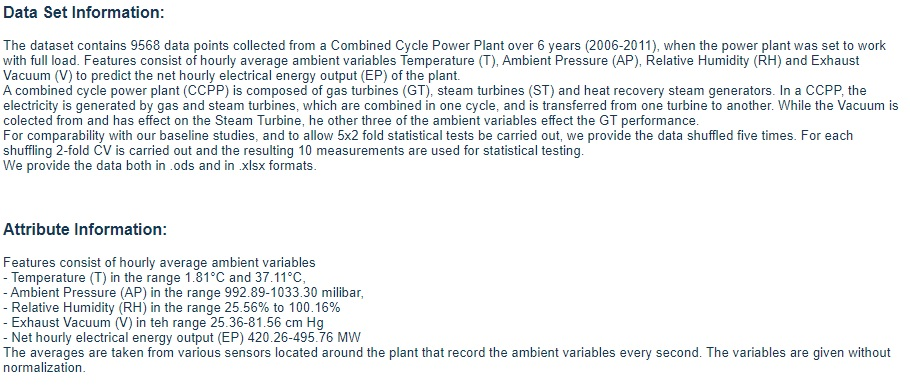

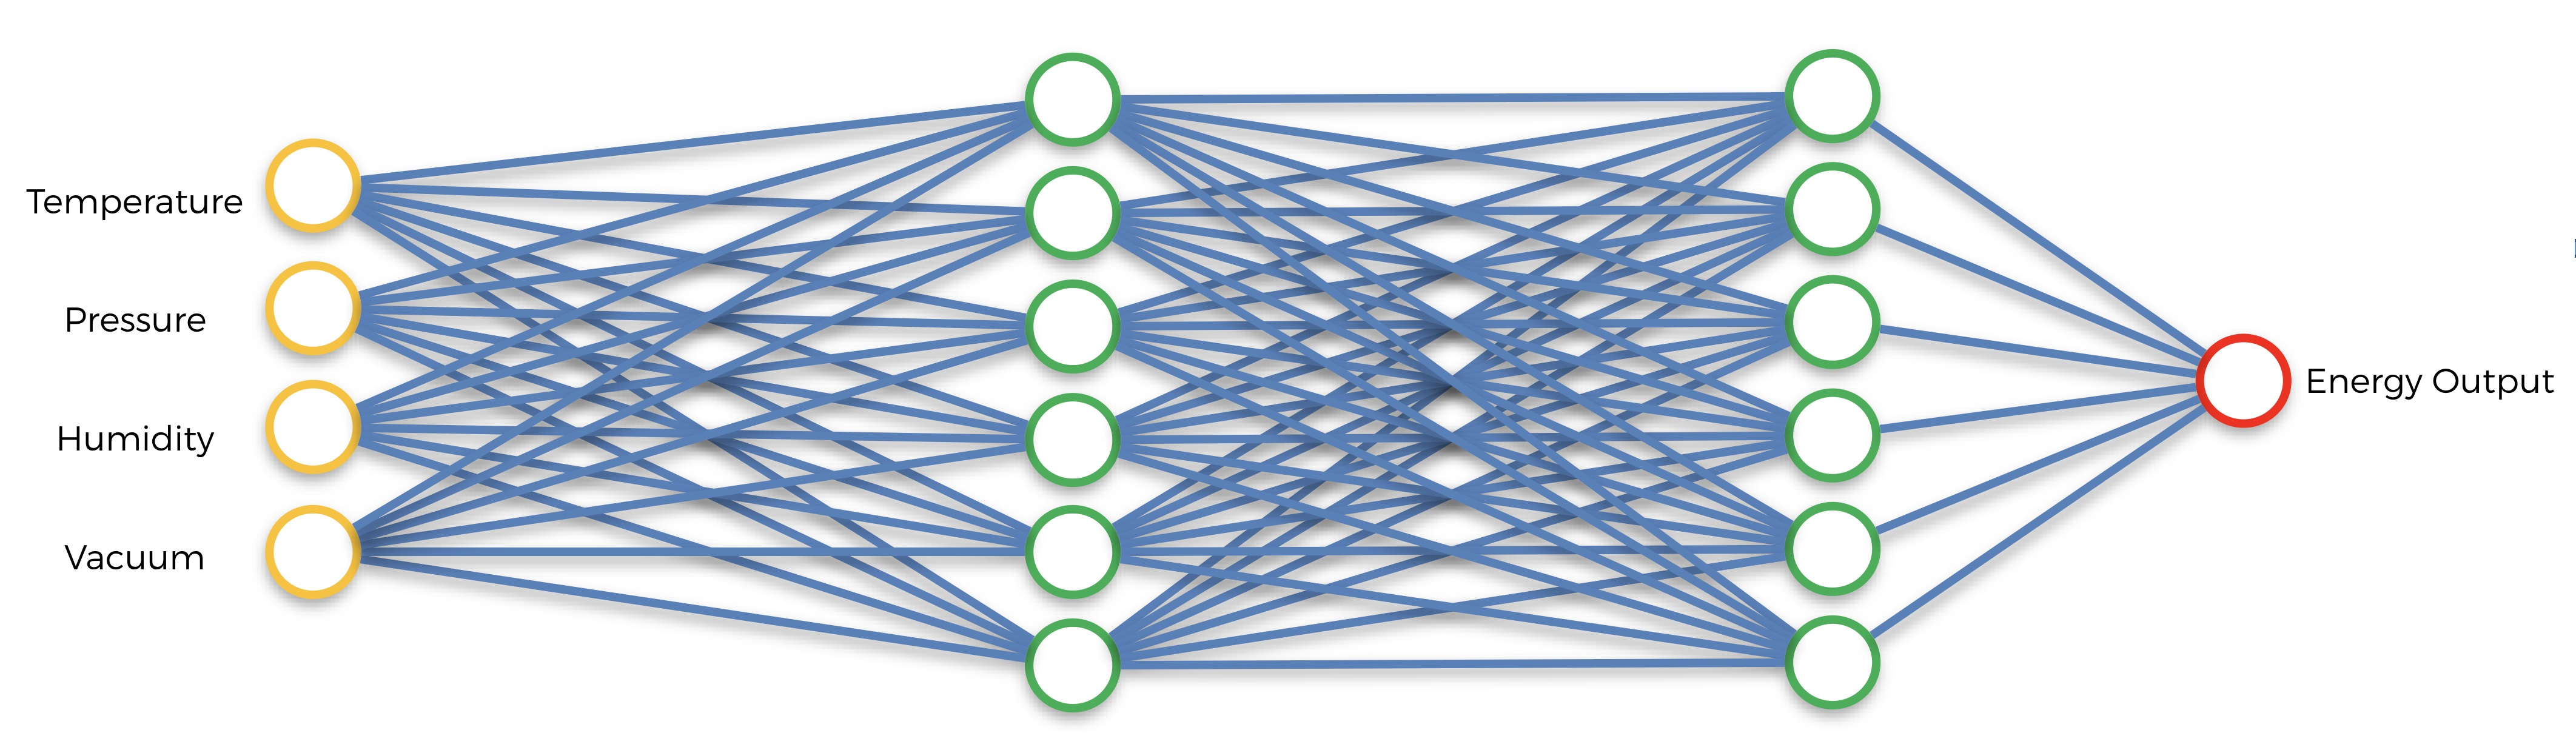

### Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
df = pd.read_excel('Folds5x2_pp.xlsx')

In [3]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


- We need to scale the data

# PRE PROCESSING

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
# Split Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# MODEL

- Building
- Compiling
- Training
- Predict Test Set
- Evaluating Results

In [6]:
# Building

ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1)) # regression cases we do not use activation function

In [7]:
# Compiling

ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [8]:
# Training

hist = ann.fit(X_train,
               y_train,
               batch_size = 32, 
               epochs = 150,
               validation_data = (X_test, y_test)) 

Epoch 1/150
240/240 [==============================] - 0s 1ms/step - loss: 13823.9414 - val_loss: 233.0477
Epoch 2/150
240/240 [==============================] - 0s 843us/step - loss: 230.6113 - val_loss: 227.2231
Epoch 3/150
240/240 [==============================] - 0s 810us/step - loss: 223.7744 - val_loss: 219.1542
Epoch 4/150
240/240 [==============================] - 0s 853us/step - loss: 215.1522 - val_loss: 209.6440
Epoch 5/150
240/240 [==============================] - 0s 884us/step - loss: 205.1488 - val_loss: 198.9032
Epoch 6/150
240/240 [==============================] - 0s 829us/step - loss: 193.6331 - val_loss: 187.9792
Epoch 7/150
240/240 [==============================] - 0s 874us/step - loss: 181.3687 - val_loss: 174.2024
Epoch 8/150
240/240 [==============================] - 0s 817us/step - loss: 168.6199 - val_loss: 160.9321
Epoch 9/150
240/240 [==============================] - 0s 824us/step - loss: 155.1820 - val_loss: 147.3813
Epoch 10/150
240/240 [===============

240/240 [==============================] - 0s 915us/step - loss: 26.6862 - val_loss: 24.6027
Epoch 79/150
240/240 [==============================] - 0s 886us/step - loss: 27.0556 - val_loss: 25.1700
Epoch 80/150
240/240 [==============================] - 0s 914us/step - loss: 27.0221 - val_loss: 25.6915
Epoch 81/150
240/240 [==============================] - 0s 823us/step - loss: 27.0296 - val_loss: 24.5966
Epoch 82/150
240/240 [==============================] - 0s 799us/step - loss: 26.9089 - val_loss: 24.8123
Epoch 83/150
240/240 [==============================] - 0s 784us/step - loss: 26.7445 - val_loss: 24.5953
Epoch 84/150
240/240 [==============================] - 0s 812us/step - loss: 27.0436 - val_loss: 24.9898
Epoch 85/150
240/240 [==============================] - 0s 812us/step - loss: 26.4942 - val_loss: 24.9615
Epoch 86/150
240/240 [==============================] - 0s 829us/step - loss: 26.9196 - val_loss: 31.5298
Epoch 87/150
240/240 [==============================] - 0s 

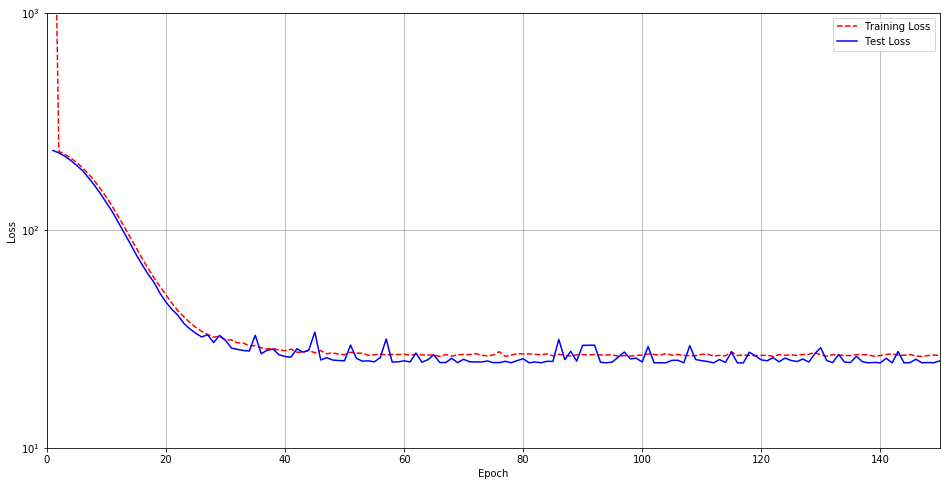

In [11]:
# Get training and test loss histories
train_loss = hist.history['loss']
test_loss  = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(train_loss) + 1)

# Visualize loss history
fig = plt.figure(figsize=(16,8)) # dpi=300 is already a evry  very good quality
plt.grid(True)
plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('symlog')
plt.xlim(0, 150)
plt.ylim(10, 1000)
plt.grid(True)
plt.show()

In [12]:
# Predicting Test Set

y_pred = ann.predict(X_test)

Mean Output Power (MW): 455.33


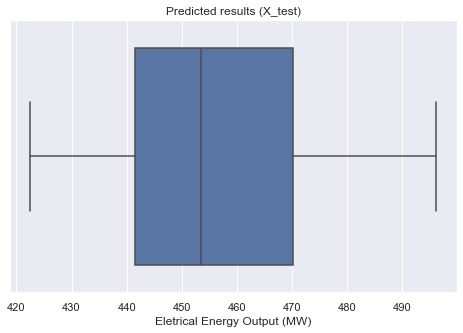

In [13]:
# results

sb.set(rc={'figure.figsize':(8,5)})
a = sb.boxplot(x = y_pred)
plt.title('Predicted results (X_test)')
plt.xlabel('Eletrical Energy Output (MW)')
print('Mean Output Power (MW): %0.2f' % y_pred.mean())